# Beginning of Roger's Code

In [2]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Alfred Hitchcock once said: “The length of a film should be directly related to the endurance of the human bladder.”

Loading in and renaming imperative datasets

In [40]:
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title = imdb_title_basics_df
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_movie = rt_movie_info_df
imdb_title.info() , rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   thea

(None, None)

Since IMDB has none non-null items in the columns that are objects and not int's or floats lets check for duplicates.

Seeing that the delta from 75th percentile to 100th percentile is 6,893.5 values shows that there may be multiple occurances of just a handful of runtimes. 

In [49]:
imdb_title['primary_title'].value_counts(), imdb_title['original_title'].value_counts(), imdb_title['tconst'].value_counts(), imdb_title['genres'].value_counts()

(Home                                                                               24
 The Return                                                                         20
 Broken                                                                             20
 Alone                                                                              16
 Homecoming                                                                         16
                                                                                    ..
 Black Indians                                                                       1
 Expect Delays                                                                       1
 Grazing the Sky                                                                     1
 Super Hero War Kamen Rider Featuring Super Sentai: Heisei Rider vs. Showa Rider     1
 The Football Boys                                                                   1
 Name: primary_title, Length: 136071, dtype

We see here that within the 'primary_title' and 'original_title" there are duplicate names. Want to clean that up. Not necessary to touch genres since genre value is applied as a description of the film rather than an interfering value.

In [57]:
# Removing/cleaning the duplicates within original_title and primary_columns 
imdb_title2 = imdb_title.drop_duplicates(subset=['original_title'], keep = 'first')
imdb_title2 = imdb_title.drop_duplicates(subset=['primary_title'], keep = 'first')
imdb_title2['primary_title'].value_counts(), imdb_title2['original_title'].value_counts(), imdb_title2['runtime_minutes'].value_counts()

(CloudStreet: Soaring the American West    1
 One Night in Seattle                      1
 Meet Me There                             1
 Now Add Honey                             1
 6ne Maili                                 1
                                          ..
 The Paradise                              1
 The Godmother                             1
 Goa Is Not India                          1
 The Caretakers                            1
 The Football Boys                         1
 Name: primary_title, Length: 136071, dtype: int64,
 Icarus                                              3
 Missed Connections                                  3
 Hatsukoi                                            3
 Stranded                                            3
 Winnie                                              2
                                                    ..
 Damasarete pero-pero: Wakarete moraimasu            1
 Jay Billion's Anything But Love                     1
 Rue des cité

We see here nearly all duplicates have been removed

Lets see now how the value counts of runtimes is dispirsed 

In [58]:
q_4_Imdb = imdb_title2["runtime_minutes"].value_counts().quantile(1)
q_3_Imdb = imdb_title2["runtime_minutes"].value_counts().quantile(.75)
q_2_Imdb = imdb_title2["runtime_minutes"].value_counts().quantile(.5)
q_1_Imdb = imdb_title2["runtime_minutes"].value_counts().quantile(.25)

q_1_Imdb , q_2_Imdb , q_3_Imdb, q_4_Imdb

(1.0, 13.0, 227.0, 6631.0)

Seeing that the delta from 75th percentile to 100th percentile is 6,404 values shows that there may be multiple occurances of just a handful of runtimes.

In [60]:
# Remove columns that will no longer be used as well as remove null values to remaining columns
imdb_title2.dropna(subset = ['start_year'],axis = 0,  inplace = True)
imdb_title2.dropna(subset = ['runtime_minutes'], axis = 0,  inplace = True)
imdb_title2.drop(['primary_title'], axis =1 , inplace = True)
imdb_title2.drop(['original_title'], axis = 1,  inplace = True)
imdb_title2.drop(['genres'], axis = 1,  inplace = True)

imdb_title2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106598 entries, 0 to 146142
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           106598 non-null  object 
 1   start_year       106598 non-null  int64  
 2   runtime_minutes  106598 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


<ipython-input-60-ab31585ae5a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_title2.dropna(subset = ['start_year'],axis = 0,  inplace = True)
<ipython-input-60-ab31585ae5a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_title2.dropna(subset = ['runtime_minutes'], axis = 0,  inplace = True)
C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [5]:
# Check for the most common runtime to appear in the dataset
most_common = imdb_title2["runtime_minutes"].value_counts().index[0]
most_common

90.0

In [61]:
#Show where the longer times are moving more towards from the most common number
G_90_Imdb = imdb_title2.loc[(imdb_title2['runtime_minutes'] > 90), ['start_year']].mean()
B_90_Imdb = imdb_title2.loc[(imdb_title2['runtime_minutes'] < 90), ['start_year']].mean()
Is_90_Imdb = imdb_title2.loc[(imdb_title2['runtime_minutes'] == 90), ['start_year']].mean()
G_90_Imdb, B_90_Imdb, Is_90_Imdb 
# Shows newer movies are tending to be longer than 90 minutes with showing the average year 
# pushing to be higher when looking at longer runtimes when looking that the mean from the
# most common value and up

(start_year    2014.462165
 dtype: float64,
 start_year    2014.233998
 dtype: float64,
 start_year    2014.39813
 dtype: float64)

To get a visual on the dataset runtime values distribution we will plot the top 70 runtime values

Text(0.5, 0, 'Run Times in Minutes')

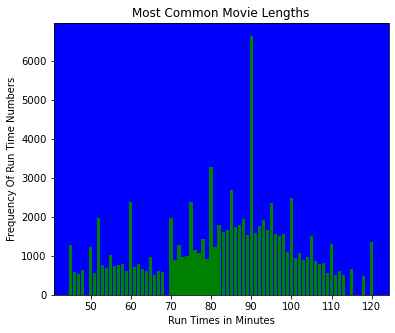

In [55]:
IMDB_Runtime_Numbers = imdb_title2['runtime_minutes'].value_counts().nlargest(70)

IMDB_Runtime_Numbers_Index = imdb_title2['runtime_minutes'].value_counts().index[0:70]
fig_IMBD, ax =plt.subplots(figsize = (6,5))
ax.bar(IMDB_Runtime_Numbers_Index ,IMDB_Runtime_Numbers , color = 'green' )
ax.set_facecolor('blue')
ax.set_ylabel("Frequency Of Run Time Numbers")
ax.set_title("Most Common Movie Lengths")
ax.set_xlabel("Run Times in Minutes")


The graph shows how often the common value of 90 minutes is used

We can move onto the Rotten Tomatoes dataset to see runtimes from movies throughout history

In [63]:
# testing the type of value that is within the runtime column
type(rt_movie['runtime'][0])

str

We see above the values in the columns are strings and must be changed into floats to be worked on

In [ ]:
# testing the type of value that is within the column
type(rt_movie['runtime'][0])

In [65]:
rt_movie['runtime_minutes']=rt_movie['runtime'].str.split()
rt_movie['runtime_minutes']=rt_movie['runtime_minutes'].str[0]
rt_movie['runtime_minutes'] = rt_movie['runtime_minutes'].astype(float)
# change runtime from a string to a solo float number

No column has just the year so we can grab from the theater_date

In [66]:
# Grabbing just the year from theater date
rt_movie['start_year']=rt_movie['theater_date'].str.split()
rt_movie['start_year']=rt_movie['start_year'].str[2]
rt_movie['start_year'] = (rt_movie['start_year']).astype(float)


In [67]:
rt_movie.dropna(axis = 0, subset = ['start_year'], inplace = True)
rt_movie.dropna(axis = 0, subset = ['runtime_minutes'], inplace = True)
# Removing any null values in the columns 'Year' and 'running_mins'

In [13]:
# Seeing if the standard feature time of 90 is more towards current movies 
rt_movie.loc[(rt_movie['runtime_minutes'] ==90), ['start_year']].mean()
# Average year being 1987 can possibly show

start_year    1986.807692
dtype: float64

In [14]:
# Dropping unnecessary columns
rt_movie.drop(['runtime'], axis =1, inplace =True)
rt_movie.drop(['studio'],axis = 1, inplace = True)
rt_movie.drop(['currency'],axis = 1, inplace = True)
rt_movie.drop(['writer'],axis = 1, inplace = True)

,id,synopsis,rating,genre,director,theater_date,dvd_date,box_office,runtime_minutes,start_year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,"Oct 9, 1971","Sep 25, 2001",NaN,104.0,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013","600,000",108.0,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,116.0,1996.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,"Dec 9, 1994","Aug 27, 1997",NaN,128.0,1994.0
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,"Mar 3, 2000","Jul 11, 2000",NaN,95.0,2000.0


In [15]:
#checking normal runtimes for newer movies
print(rt_movie.loc[(rt_movie['start_year'] >=2015),['runtime_minutes']].mean())
print(rt_movie.loc[(rt_movie['start_year'] >=2015),['runtime_minutes']].max())
print(rt_movie.loc[(rt_movie['start_year'] >=2015),['runtime_minutes']].min())
# rt_movie.loc[(rt_movie['Year'] >=2015),['running_mins']]
#Ave 16 mins longer than mode of data set
# Max length 148 min
# Min legnth 80
#Showing More Modern Movies are longer than the feature length Standard
# Modern movies being greater in this case being 2015 and present 

runtime_minutes    106.461538
dtype: float64
runtime_minutes    148.0
dtype: float64
runtime_minutes    80.0
dtype: float64


In [16]:
#function to do what was above, just grabbing the float number from the string
def string_to_float(df, series):
    df[series] = df[series].str.split()
    df[series] = df[series].str[0]
    df[series] = df[series].astype(float)
    return df[series]
    

In [17]:
q_4_rt = rt_movie["runtime_minutes"].value_counts().quantile(1)
q_3_rt = rt_movie["runtime_minutes"].value_counts().quantile(.75)
q_2_rt = rt_movie["runtime_minutes"].value_counts().quantile(.5)
q_1_rt = rt_movie["runtime_minutes"].value_counts().quantile(.25)
q_1_rt , q_2_rt, q_3_rt, q_4_rt
# shows broad range and may want to ignore anything below q_3

(1.25, 3.0, 18.0, 53.0)

In [69]:
Top_70_RT_Indexes = rt_movie['runtime_minutes'].value_counts().index[:70]
Top_70_RT = rt_movie['runtime_minutes'].value_counts().nlargest(70)
#grabbbing 70 most common runtimes from rotten tomatoes file 

Lets plot a chart the get a visual on runtime with a datset that has a longer time history

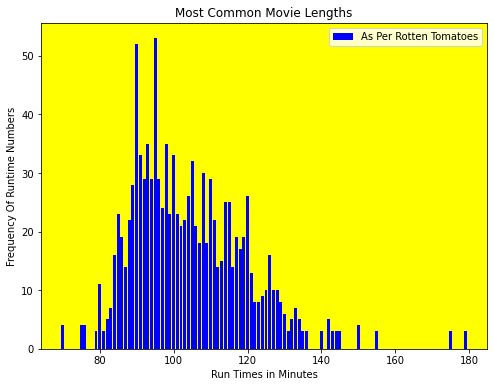

In [70]:
fig_rt , ax = plt.subplots(figsize = (8,6))
ax.bar(Top_70_RT_Indexes , Top_70_RT, color = 'blue' )
ax.set_ylabel("Frequency Of Runtime Numbers")
ax.set_xlabel("Run Times in Minutes")
ax.set_title('Most Common Movie Lengths')
ax.set_facecolor('yellow')
ax.legend(['As Per Rotten Tomatoes'])
# plot showing top 70 most common runtimes


Still seeing the heavy grouping around the common90 minute runtime number

In [71]:
# Gathering Values within Rotten Tomatoes File Where only looking at frequncy runtime within the past 10 years
# just like the IMDB dataset
P10_Years_RT = rt_movie.loc[(rt_movie['start_year'] >=2011),['runtime_minutes']].value_counts().nlargest(50)
ten = P10_Years_RT.index[0:50]
# way to turn multi-index into float values for the x column
P10_Index = ten.get_level_values(0).astype(float)

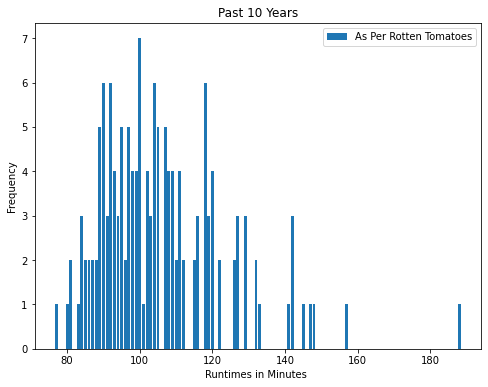

In [72]:
# Graph shoiwing most frequent runtimes of the past 10 years rotten tomatoes graph
fig_Rotten_Modern , ax= plt.subplots(figsize = (8,6))
ax.bar(P10_Index, P10_Years_RT)
ax.set_xlabel('Runtimes in Minutes ')
ax.set_ylabel('Frequency')
ax.set_title('Past 10 Years')
ax.legend(['As Per Rotten Tomatoes'])

Lets get a far better visual on how runtimes have been either increasing or decreasing over time

In [73]:
# top most 5 or 10 common of each decade put in a list or dictionary key, year ,value most common runtime put in line chart?
mode_1 = rt_movie.loc[rt_movie['start_year'] < 1941, ['runtime_minutes']].mode()
mode_2 = rt_movie.loc[(rt_movie['start_year'] >= 1941) & (rt_movie['start_year'] <1961), ['runtime_minutes']].mode()
mode_3 = rt_movie.loc[(rt_movie['start_year'] >= 1961) & (rt_movie['start_year'] <1981), ['runtime_minutes']].mode()
mode_4 = rt_movie.loc[(rt_movie['start_year'] >= 1981) & (rt_movie['start_year'] <2001), ['runtime_minutes']].mode()
mode_5 = rt_movie.loc[(rt_movie['start_year'] >= 2001) & (rt_movie['start_year'] <2011), ['runtime_minutes']].mode()
mode_6 = rt_movie.loc[(rt_movie['start_year'] >= 2011) , ['runtime_minutes']].mode()
mode_7 = rt_movie.loc[(rt_movie['start_year'] == 2018) , ['runtime_minutes']].mode()
median_1 = rt_movie.loc[rt_movie['start_year'] < 1941, ['runtime_minutes']].median()
median_2 = rt_movie.loc[(rt_movie['start_year'] >= 1941) & (rt_movie['start_year'] <1961), ['runtime_minutes']].median()
median_3 = rt_movie.loc[(rt_movie['start_year'] >= 1961) & (rt_movie['start_year'] <1981), ['runtime_minutes']].median()
median_4 = rt_movie.loc[(rt_movie['start_year'] >= 1981) & (rt_movie['start_year'] <2001), ['runtime_minutes']].median()
median_5 = rt_movie.loc[(rt_movie['start_year'] >= 2001) & (rt_movie['start_year'] <2011), ['runtime_minutes']].median()
median_6 = rt_movie.loc[(rt_movie['start_year'] >= 2011) , ['runtime_minutes']].median()
median_7 = rt_movie.loc[(rt_movie['start_year'] == 2018) , ['runtime_minutes']].median()
mean_1 = rt_movie.loc[rt_movie['start_year'] < 1941, ['runtime_minutes']].mean()
mean_2 = rt_movie.loc[(rt_movie['start_year'] >= 1941) & (rt_movie['start_year'] <1961), ['runtime_minutes']].mean()
mean_3 = rt_movie.loc[(rt_movie['start_year'] >= 1961) & (rt_movie['start_year'] <1981), ['runtime_minutes']].mean()
mean_4 = rt_movie.loc[(rt_movie['start_year'] >= 1981) & (rt_movie['start_year'] <2001), ['runtime_minutes']].mean()
mean_5 = rt_movie.loc[(rt_movie['start_year'] >= 2001) & (rt_movie['start_year'] <2011), ['runtime_minutes']].mean()
mean_6 = rt_movie.loc[(rt_movie['start_year'] >= 2011) , ['runtime_minutes']].mean()
mean_7 = rt_movie.loc[(rt_movie['start_year'] == 2018) , ['runtime_minutes']].mean()
print(mode_1, mode_2, mode_3, mode_4, mode_5, mode_6, mode_7)
print(mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7)
print(median_1, median_2, median_3, median_4, median_5, median_6, median_7)
#modes being in order   80, 90 , 95, 95, 102, 100, 105 with mode_5 and mode_7 having multiple modes therefore took the average of them
#medians being 94, 98, 104, 103, 102, 104, 107
#means 100, 102, 110, 107, 104, 107, 111

   runtime_minutes
0             80.0    runtime_minutes
0             90.0    runtime_minutes
0             95.0    runtime_minutes
0             95.0    runtime_minutes
0             93.0
1             95.0
2            108.0
3            115.0    runtime_minutes
0            100.0    runtime_minutes
0             90.0
1            120.0
runtime_minutes    99.833333
dtype: float64 runtime_minutes    102.362637
dtype: float64 runtime_minutes    110.300699
dtype: float64 runtime_minutes    106.526316
dtype: float64 runtime_minutes    104.058065
dtype: float64 runtime_minutes    107.195122
dtype: float64 runtime_minutes    110.4
dtype: float64
runtime_minutes    93.5
dtype: float64 runtime_minutes    98.0
dtype: float64 runtime_minutes    104.0
dtype: float64 runtime_minutes    102.5
dtype: float64 runtime_minutes    102.0
dtype: float64 runtime_minutes    104.0
dtype: float64 runtime_minutes    106.5
dtype: float64


C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

Text(0.5, 1.0, 'The Gradual Increase Of Movie Runtimes Through History ')

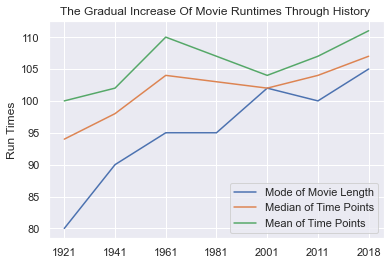

In [39]:
mode_values = [80, 90, 95, 95, 102, 100, 105]
Time = ['1921', '1941', '1961', '1981', '2001', '2011', '2018' ]
median_values = [94,98,104,103,102,104,107]
mean_values = [100, 102, 110, 107, 104, 107, 111]
sns.set_theme(style="darkgrid")
sns.lineplot(Time, mode_values)
sns.set_theme(style="darkgrid")
sns.lineplot(Time, median_values)
sns.lineplot(Time, mean_values)
plt.legend(['Mode of Movie Length', 'Median of Time Points' , 'Mean of Time Points'])
plt.ylabel('Run Times')
plt.title('The Gradual Increase Of Movie Runtimes Through History ')
#Line graph to show non-technical viewer that trend for movie lengths is getting longer since 1921

As we have gotten down here at the last graph it shows how overtime the runtimes are going longer than the industry standard. With the industry standard being implemented back in the 1920's to make sure movies weren't overbearing to the public. But now that movies are getting longer and straying from the 90 minute mark it is safe to say that following the trend of breaking the industry standard is a safe bet because it can allow the studio to not be constricted to this 90 minute mark and possibly lmiting what can be put in the film.